In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1.好きな図形を囲む

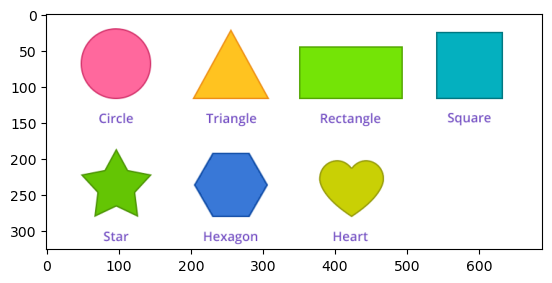

In [7]:
img_path = "C:\\Users\\Shimo_Y_15\\20230519\img\\different_shapes.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

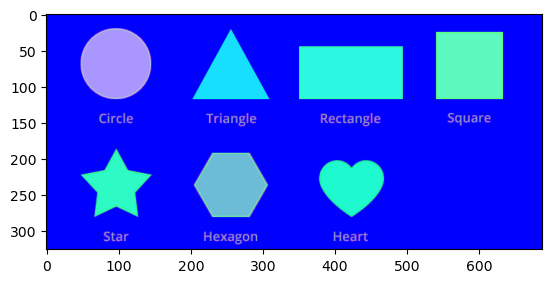

In [8]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [11]:
img_hsv[250,100]

array([ 45, 250, 197], dtype=uint8)

In [12]:
h,s,v = img_hsv[250,100]

In [13]:
upper = np.array([h+5, s+30, v+50])
lower = np.array([h-5, s-30, v-50])

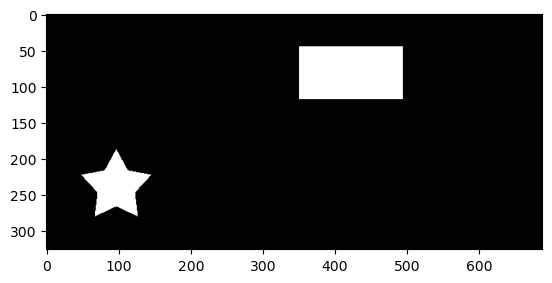

In [14]:
img_range = cv2.inRange(img_hsv, lower, upper)
plt.imshow(img_range,'gray')

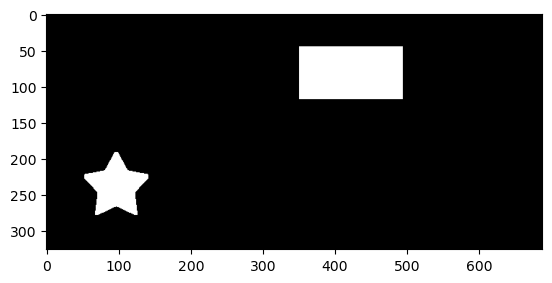

In [18]:
kernel = np.ones((5,5), np.uint8)
img_erode = cv2.erode(img_range, kernel)
img_dilate = cv2.dilate(img_erode, kernel)
plt.imshow(img_dilate, 'gray')

In [19]:
contours, hierachy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

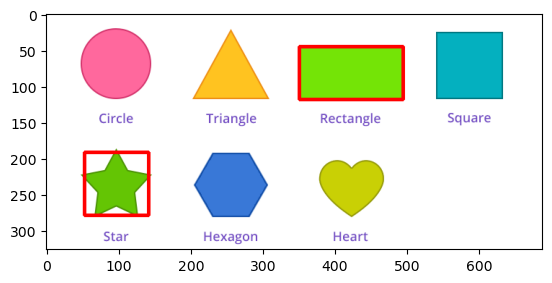

In [21]:
for each_contour in contours:
    x,y,w,h, = cv2.boundingRect(each_contour)
    
    img_rect = cv2.rectangle(img_rgb, (x,y), (x+w,y+h),(255,0,0),3)
plt.imshow(img_rgb)

## 2.好きな果物を囲む

In [118]:
img2_path = "C:\\Users\\Shimo_Y_15\\20230523\\978-1.jpg"

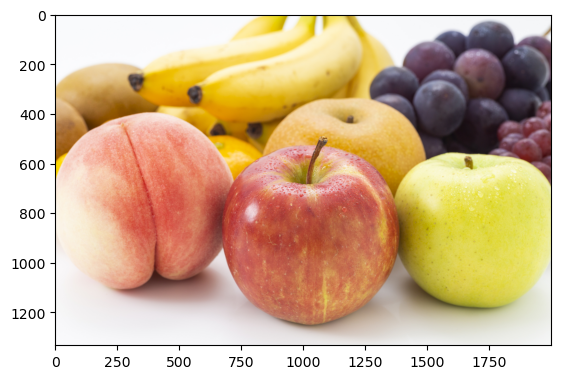

In [162]:
img2 = cv2.imread(img2_path)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_copy = img2_rgb
plt.imshow(img2_rgb)

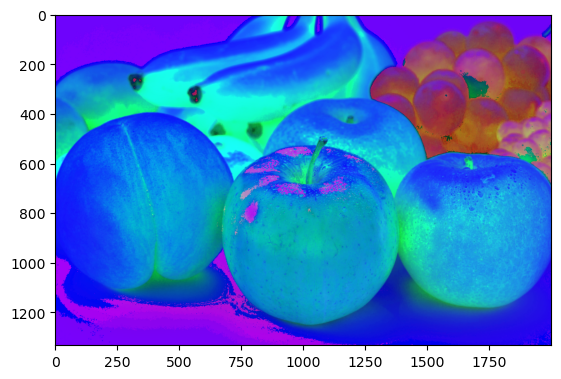

In [163]:
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
plt.imshow(img2_hsv)

In [164]:
img2_hsv[1000,1750]

array([ 28, 161, 224], dtype=uint8)

In [165]:
h,s,v = img2_hsv[1000,1750]

In [166]:
upper = np.array([h+5,s+30,v+50])
lower = np.array([h-5,s-30,v-50])

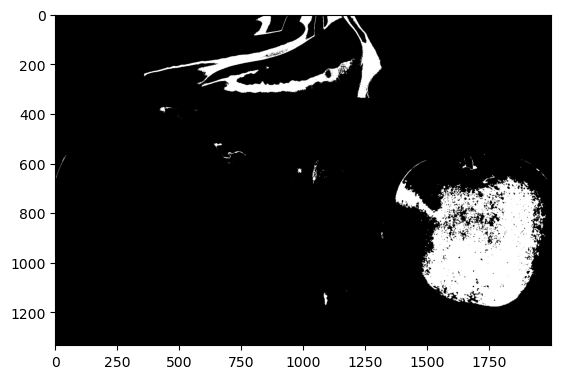

In [167]:
img2_range = cv2.inRange(img2_hsv, lower, upper)
plt.imshow(img2_range,'gray')

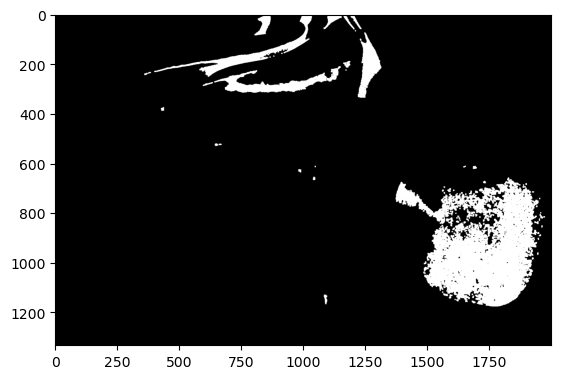

In [168]:
kernel = np.ones((5,5),np.uint8)
img2_erode = cv2.erode(img2_range,kernel,5)
img2_dilate = cv2.dilate(img2_erode,kernel,5)
plt.imshow(img2_dilate,'gray')

In [169]:
contours, hierarchy2 = cv2.findContours(img2_dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

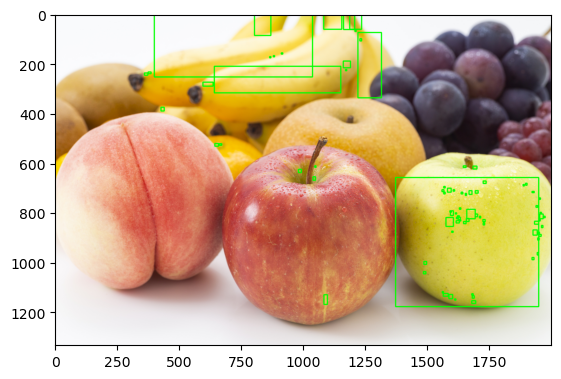

In [171]:
for each_contour in contours:
    x,y,w,h = cv2.boundingRect(each_contour)
    img2_rect = cv2.rectangle(img2_rgb,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img2_copy)

## 3.調べる

In [1]:
## cv2.RETR_EXTERNAL       : 一番外側の輪郭だけを抽出する
## cv2.RETR_LIST           : 全ての輪郭を抽出するが、階層構造は作成しない
## cv2.RETR_TREE           : 全ての輪郭を抽出し、ツリーで階層構造を作成する
## cv2.RETE_CCOMP          : 全ての輪郭を抽出し、２階層構造を作成する
## cv2.CHAIN_APPROX_SIMPLE : 輪郭を出力するときに省略できる検出点を省略して出力する。

## 4.cv2.inRange関数を自作する

In [159]:
def my_inRange(img_hsv, lower,upper):
    i,j,k = img_hsv.shape
    print(i)
    print(j)
    print(k)
    base = np.zeros((i,j,k),dtype = np.uint8)
    for x in range(i):
        for y in range(j):
            a,b,c = img_hsv[x,y]
            if upper[0]>=a and lower[0]<=a:
                if upper[1]>=b and lower[1]<=b:
                    if upper[2]>=c and lower[2]<=c:
                        base[x,y,0] = 255
                        base[x,y,1] = 255
                        base[x,y,2] = 255
    return base

326
688
3


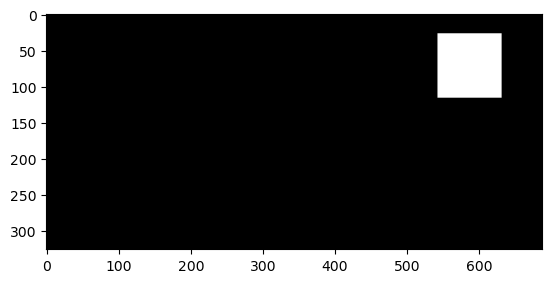

In [160]:
img_path = "C:\\Users\\Shimo_Y_15\\20230519\img\\different_shapes.png"
img = cv2.imread(img_path)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_hsv.shape

h,s,v = img_hsv[50,600]
# print(h)
# print(s)
# print(v)

upper = np.array([h+5, s+30, v+50])
lower = np.array([h-5, s-30, v-50])

img_range = my_inRange(img_hsv,lower, upper)
plt.imshow(img_range)